# DATA AIRPORTS

### Librerías a usar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Dataframe

In [3]:
# Leemos el csv copiando la ruta desde el ordenador y creamos el dataframe
df = pd.read_csv(r'C:\Users\kina5\Desktop\Bootcamp\Temario\Modulo_1\07-Visualizacion_datos\proyecto_airports\airports\Data\Airports.csv')

- Obtenemos información del df

In [4]:
df.columns

Index(['Rank2016', 'Airport', 'City served', 'Country', 'Passengers2016',
       'Passengers2015', 'Change 2016-2015-Num', 'Change 2016-2015-%'],
      dtype='object')

In [5]:
df.shape

(100, 8)

In [6]:
df.head()

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
0,1,Heathrow Airport,London,United Kingdom,75711130,74985475,725655,"%0,97"
1,2,Charles de Gaulle Airport,Paris,France,65933145,65766986,166159,"%0,25"
2,3,Amsterdam Airport Schiphol,Amsterdam,Netherlands,63625664,58284848,5340816,"%9,16"
3,4,Frankfurt Airport,Frankfurt,Germany,60786937,61032022,-245085,"-%0,40"
4,5,Istanbul Atatürk Airport,Istanbul,Turkey,60415470,61322729,-907259,"-%1,48"


In [7]:
df.info() # Vemos que no hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank2016              100 non-null    int64 
 1   Airport               100 non-null    object
 2   City served           100 non-null    object
 3   Country               100 non-null    object
 4   Passengers2016        100 non-null    int64 
 5   Passengers2015        100 non-null    int64 
 6   Change 2016-2015-Num  100 non-null    int64 
 7   Change 2016-2015-%    100 non-null    object
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [92]:
df.duplicated().sum() # Tampoco hay valores duplicados

0

In [94]:
df.dtypes # vemos los tipos de datos que tenemos

Rank2016                  int64
Airport                  object
City served              object
Country                  object
Passengers2016            int64
Passengers2015            int64
Change 2016-2015-Num      int64
Change 2016-2015-%      float64
dtype: object

In [95]:
df.columns # vemos las columnas del df

Index(['Rank2016', 'Airport', 'City served', 'Country', 'Passengers2016',
       'Passengers2015', 'Change 2016-2015-Num', 'Change 2016-2015-%'],
      dtype='object')

### Preprocesamiento

- Hemos visto que no hay valores nulos ni duplicados que reparar o eliminar.

- La columna Change 2016-2015-% tiene un símbolo % al principio y además tiene comas y puntos. Hay que extraer los números y limpiarla

In [8]:
# Primero cambiamos las , por .
df['Change 2016-2015-%'] = df['Change 2016-2015-%'].str.replace(',','.')

In [9]:
# Ahora nos quedamos con el número y nos aseguramos que es float
df['Change 2016-2015-%'] = df['Change 2016-2015-%'].str.replace('%','').astype(float)
df['Change 2016-2015-%']

0     0.97
1     0.25
2     9.16
3    -0.40
4    -1.48
      ... 
95    7.76
96    3.17
97   -0.66
98    4.79
99    3.07
Name: Change 2016-2015-%, Length: 100, dtype: float64

### Análisis de los datos

#### 1. Crea un gráfico de barras que muestre el número de pasajeros en 2016 para los 10 aeropuertos más concurridos.

In [97]:
# Creo un top10 de aeropuertos en base al número de pasajeros en 2016
top10_airports = df.sort_values('Passengers2016', ascending=False).head(10) # Otra opción es df.nlargest(10, 'Passengers2016')
top10_airports

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
0,1,Heathrow Airport,London,United Kingdom,75711130,74985475,725655,0.97
1,2,Charles de Gaulle Airport,Paris,France,65933145,65766986,166159,0.25
2,3,Amsterdam Airport Schiphol,Amsterdam,Netherlands,63625664,58284848,5340816,9.16
3,4,Frankfurt Airport,Frankfurt,Germany,60786937,61032022,-245085,-0.40
4,5,Istanbul Atatürk Airport,Istanbul,Turkey,60415470,61322729,-907259,-1.48
5,6,Adolfo Suárez Madrid–Barajas Airport,Madrid,Spain,50420583,46824838,3595745,7.68
6,7,Barcelona–El Prat Josep Tarradellas Airport,Barcelona,Spain,44154693,39711237,4443456,11.19
7,8,Gatwick Airport,London,United Kingdom,43119628,40269087,2850541,7.08
8,9,Munich Airport,Munich,Germany,42261309,40981522,1279787,3.12
9,10,Leonardo da Vinci–Fiumicino Airport,Rome,Italy,41744769,40463208,1281561,3.17


In [98]:
fig = px.bar(top10_airports, x='Airport', y='Passengers2016', color='Passengers2016',color_continuous_scale='BrBG')
#actualizamos el layout
fig.update_layout(
    title='Pasajeros durante el año 2016', title_x=0.5, # Para poner el título en medio
    yaxis_title='Cantidad de pasajeros',
    xaxis_title='Aeropuerto',
    template='plotly_white',
    width=900, height=500)
fig.update_coloraxes(colorbar_title='Pasajeros') # tenemos que aactualizar las propiedades de los ejes de color para poder ponerle título a la leyenda

# Hacemos que cada barra nos diga el texto de cantidad de pasajeros
fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()

#### 2. Genera un gráfico de líneas para comparar la cantidad de pasajeros entre 2015 y 2016 para los 5 aeropuertos principales, asignando un color distinto a cada aeropuerto.

In [88]:
top5_airports = df.head()

In [87]:
fig2 = px.line(top5_airports, x='Airport', y=['Passengers2016','Passengers2015'])
#actualizamos el layout
fig2.update_layout(
    title='Comparación de la cantidad de pasajeros en el 2015 y 2016', title_x=0.5, 
    yaxis_title='Cantidad de pasajeros',
    xaxis_title='Aeropuerto',
    legend_title_text="Evolución entre los años 2015 y 2016",
)
fig2.show()

#### 3. Elabora un histograma para analizar la distribución del cambio porcentual en el número de pasajeros entre 2015 y 2016.

In [99]:
fig3 = px.histogram(df, x="Change 2016-2015-%", template="plotly_white", nbins=40)
fig3.update_layout(
    title='Distribución del cambio de pasajeros entre 2015 y 2016 (%)',
    yaxis_title='Cantidad de pasajeros',
    xaxis_title='Porcentaje',  title_x=0.5,
    template='plotly_white',
    width=1200, height=600)  
# Personalizar el diseño
fig3.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig3.update_layout(bargap=0.1)  # Espacio entre barras

fig3.show()

#### 4. Desarrolla un diagrama de dispersión que compare el ranking en 2016 con el número de pasajeros en 2016 e incluye una línea de tendencia.

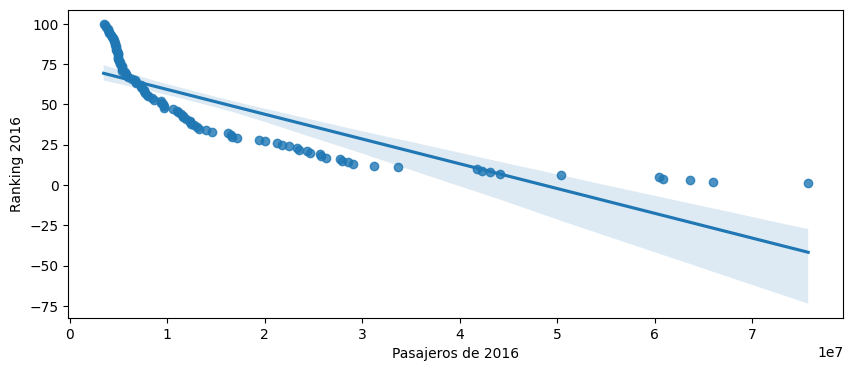

In [108]:
# Establecer las dimensiones del gráfico
plt.figure(figsize=(10, 4))

# Crear el diagrama de dispersión con línea de tendencia
sns.regplot(x='Passengers2016', y='Rank2016', scatter=True, data=df)

# Agregar títulos a los ejes
plt.xlabel('Pasajeros de 2016')
plt.ylabel('Ranking 2016')

# Mostrar el gráfico
plt.show()

#### 5. Crea un mapa de calor que muestre la correlación entre las variables numéricas del dataset.

In [131]:
# Calculamos la correlación entre las columnas seleccionadas y obtenemos la matriz 
df_corr = df[['Rank2016', 'Passengers2016', 'Passengers2015', 'Change 2016-2015-Num','Change 2016-2015-%']].corr()

# Creamos un mapa de calor con la matriz de correlación generada
fig5 = px.imshow(df_corr, text_auto = True, color_continuous_scale='BuPu')
fig5.update_layout(
    title='Correlación entre las variables', title_x=0.5,
    template='plotly_white',
	width=800, height=600) 
# Mostramos la figura
fig5.show()

#### 6. Construye un gráfico circular para mostrar la distribución porcentual de pasajeros entre los cinco principales países con aeropuertos en la lista.

In [22]:
# Obtengo los países con más aeropuertos ordenados
countries_airports = df['Country'].value_counts().sort_values(ascending=False)
# Obtengo los nombres (índices) de los 5 primeros
top5_countries_airports = countries_airports.head().index.tolist()
top5_countries_airports

['United Kingdom', 'Italy', 'Germany', 'Spain', 'France']

In [23]:
# Filtra el df original para incluir solo los aeropuertos de esos cinco países
df_filtrado = df[df['Country'].isin(top5_countries_airports)] # .isin comprueba si cada elemento de la columna Country está contenido en la lista top5
df_filtrado.head()

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
0,1,Heathrow Airport,London,United Kingdom,75711130,74985475,725655,0.97
1,2,Charles de Gaulle Airport,Paris,France,65933145,65766986,166159,0.25
3,4,Frankfurt Airport,Frankfurt,Germany,60786937,61032022,-245085,-0.40
5,6,Adolfo Suárez Madrid–Barajas Airport,Madrid,Spain,50420583,46824838,3595745,7.68
6,7,Barcelona–El Prat Josep Tarradellas Airport,Barcelona,Spain,44154693,39711237,4443456,11.19


In [80]:
fig6 = px.pie(df_filtrado, values='Passengers2016', names='Country')
fig6.update_layout(
    template="plotly_white",
    title="Porcentaje de pasajeros en aeropuertos por países",
    title_x=0.5,
    legend_title_text="Países",
    width=800, height=600)
fig6.show()

#### 7. Diseña un gráfico de cajas para analizar la distribución del número de pasajeros en 2016 entre los aeropuertos.

In [25]:
df.head()

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
0,1,Heathrow Airport,London,United Kingdom,75711130,74985475,725655,0.97
1,2,Charles de Gaulle Airport,Paris,France,65933145,65766986,166159,0.25
2,3,Amsterdam Airport Schiphol,Amsterdam,Netherlands,63625664,58284848,5340816,9.16
3,4,Frankfurt Airport,Frankfurt,Germany,60786937,61032022,-245085,-0.40
4,5,Istanbul Atatürk Airport,Istanbul,Turkey,60415470,61322729,-907259,-1.48


In [66]:
fig7 = px.box(df, x='Passengers2016', y="Airport", template="plotly_dark")
fig7.update_layout(
    title='Distribución del número de pasajeros durante el año 2016 entre aeropuertos',
    yaxis_title='Aeropuertos',
    xaxis_title='Pasajeros en 2016', title_x=0.5,
    template='plotly_white')
fig7.show()

Con el siguiente código podemos obtener las cajas para el top5 de aeropuertos:

In [27]:
for index, row in top5_airports.iterrows():
    fig = go.Figure()
    fig.add_trace(go.Box(y=[row['Passengers2016']], name=row['Airport'], marker_color='blue'))
    fig.update_layout(title='Distribution of Number of Passengers in 2016', yaxis_title='Number of Passengers', xaxis_title='Airport', template='plotly_dark')
    fig.show()

#### 8. Realiza un pairplot para mostrar las relaciones bivariadas entre el "Rank2016", "Passengers2016" y "Passengers2015".

In [28]:
# Primero selecciono las columnas
df_selected = df[['Rank2016', 'Passengers2016', 'Passengers2015']]

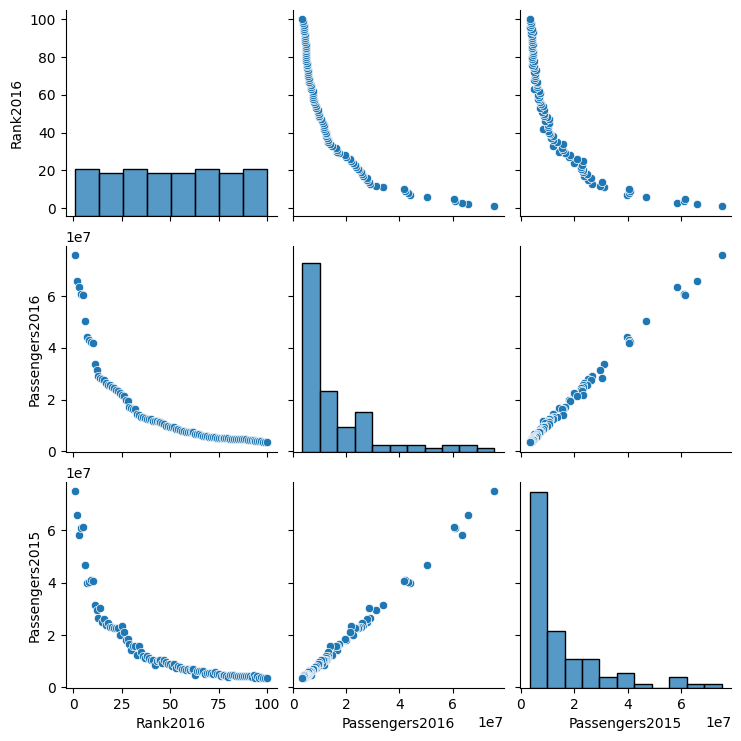

In [29]:
sns.pairplot(df_selected)

#### 9. Produce un gráfico de barras apiladas para comparar el número de pasajeros en 2015 y 2016 para los 10 principales aeropuertos.

In [63]:
fig9 = px.bar(top10_airports, x=['Passengers2015',"Passengers2016"],y='Airport',template='plotly_dark')
fig9.update_layout(
    yaxis_title='Aeropuerto',
    xaxis_title='Cantidad de pasajeros',
    legend_title_text="Pasajeros",
    width=1000, height=400)

fig9.show()

#### 10. Elabora un gráfico de líneas para mostrar la tendencia del número de pasajeros desde el aeropuerto más concurrido hasta el menos concurrido en 2016.

In [61]:
airports2016 = df.sort_values('Passengers2016', ascending=False)

In [60]:
fig10 = px.line(airports2016, x='Airport', y="Passengers2016")
fig10.update_layout(
    yaxis_title='Aeropuerto',
    xaxis_title='Cantidad de pasajeros',
    width=800, height=700)
fig10.show()

#### 11. Crea un diagrama de violín para comparar la distribución del cambio de pasajeros (2016-2015) entre los países representados en el dataset.

In [34]:
df.head()

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
0,1,Heathrow Airport,London,United Kingdom,75711130,74985475,725655,0.97
1,2,Charles de Gaulle Airport,Paris,France,65933145,65766986,166159,0.25
2,3,Amsterdam Airport Schiphol,Amsterdam,Netherlands,63625664,58284848,5340816,9.16
3,4,Frankfurt Airport,Frankfurt,Germany,60786937,61032022,-245085,-0.40
4,5,Istanbul Atatürk Airport,Istanbul,Turkey,60415470,61322729,-907259,-1.48


In [59]:
fig11 = px.violin(df, y='Country', x='Change 2016-2015-%', box=True, points='all')
fig11.update_layout(
    title='Distribution of Passenger Change (2016-2015) among Countries',
    yaxis_title='Country',
    xaxis_title='Percentage Change',  title_x=0.5, # Para poner el título en medio
    template="plotly_white",
    width=1000, height=500)

fig11.show()

#### 12. Genera un gráfico de áreas que ilustre cómo cambia el número de pasajeros entre los aeropuertos del top 5 en 2016.

In [36]:
top5_airports

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
0,1,Heathrow Airport,London,United Kingdom,75711130,74985475,725655,0.97
1,2,Charles de Gaulle Airport,Paris,France,65933145,65766986,166159,0.25
2,3,Amsterdam Airport Schiphol,Amsterdam,Netherlands,63625664,58284848,5340816,9.16
3,4,Frankfurt Airport,Frankfurt,Germany,60786937,61032022,-245085,-0.40
4,5,Istanbul Atatürk Airport,Istanbul,Turkey,60415470,61322729,-907259,-1.48


In [52]:
fig12 = px.area(top5_airports, x="Passengers2016", y="Airport", color = 'Passengers2016', hover_name="Country")
fig12.update_layout(
    title='Evolución de la cantidad de pasajeros entre el top5 de aeropuertos en 2016',
    yaxis_title='Aeropuerto',
    xaxis_title='Pasajeros',
    template="seaborn",
    legend_title_text="Pasajeros")
    
fig12.show()

#### 13. Implementa un mapa interactivo que muestre la ubicación de cada aeropuerto junto con su volumen de pasajeros en 2016.

#### 14. Crea un gráfico de regresión para analizar la relación entre el ranking de 2016 y el cambio numérico de pasajeros de 2015 a 2016.

In [38]:
df.head()

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
0,1,Heathrow Airport,London,United Kingdom,75711130,74985475,725655,0.97
1,2,Charles de Gaulle Airport,Paris,France,65933145,65766986,166159,0.25
2,3,Amsterdam Airport Schiphol,Amsterdam,Netherlands,63625664,58284848,5340816,9.16
3,4,Frankfurt Airport,Frankfurt,Germany,60786937,61032022,-245085,-0.40
4,5,Istanbul Atatürk Airport,Istanbul,Turkey,60415470,61322729,-907259,-1.48


In [44]:
fig14 = px.scatter(
    df, x='Rank2016', y='Change 2016-2015-Num', opacity=0.65, # opacity: opacidad de puntos (a mayor num mayor opacidad)
    trendline='ols', trendline_color_override='darkblue'      # trendline muestra la línea de tendencia
)
fig14.update_layout(
    yaxis_title='Cambio numérico de pasajeros entre 2015 y 2016',
    xaxis_title='Ranking 2016',
    template="seaborn",
    legend_title_text="Pasajeros")
fig14.show()

#### 15. Diseña un gráfico de barras horizontales que muestre el cambio porcentual de pasajeros para cada aeropuerto entre 2015 y 2016.

In [47]:
fig15 = px.bar(
    df, y='Change 2016-2015-%', x='Airport')

fig15.update_layout(
    yaxis_title='Cambio porcentual de pasajeros entre 2015 y 2016',
    xaxis_title='Ranking 2016',
    template="seaborn",
    width=800, height=600)
fig15.show()